# Word Mover’s Distance

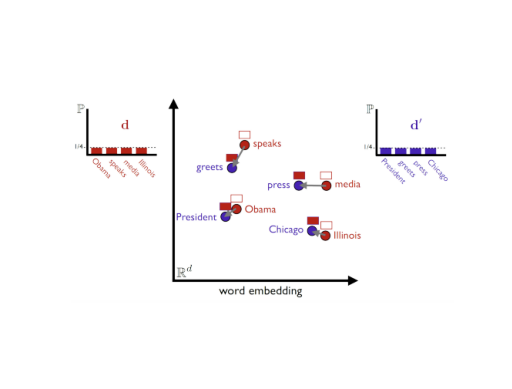

In [2]:
# Image from https://vene.ro/images/wmd-obama.png
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('./img/wmd-obama.png')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

# Computing the Word Mover’s Distance

In [3]:
# Initialize logging.
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

sentence_obama = 'Obama speaks to the media in Illinois'
sentence_president = 'The president greets the press in Chicago'

In [4]:
# Import and download stopwords from NLTK.
from nltk.corpus import stopwords
from nltk import download
download('stopwords')  # Download stopwords list.
stop_words = stopwords.words('english')

def preprocess(sentence):
    return [w for w in sentence.lower().split() if w not in stop_words]

sentence_obama = preprocess(sentence_obama)
sentence_president = preprocess(sentence_president)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AxelArcidiaco\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
import gensim.downloader as api
model = api.load('word2vec-google-news-300')

2023-04-04 16:02:13,483 : INFO : loading projection weights from C:\Users\AxelArcidiaco/gensim-data\word2vec-google-news-300\word2vec-google-news-300.gz
2023-04-04 16:04:01,251 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (3000000, 300) matrix of type float32 from C:\\Users\\AxelArcidiaco/gensim-data\\word2vec-google-news-300\\word2vec-google-news-300.gz', 'binary': True, 'encoding': 'utf8', 'datetime': '2023-04-04T16:04:01.251045', 'gensim': '4.3.1', 'python': '3.9.16 (main, Mar  8 2023, 10:39:24) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'load_word2vec_format'}


In [6]:
distance = model.wmdistance(sentence_obama, sentence_president)
print('distance = %.4f' % distance)

2023-04-04 16:04:01,713 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2023-04-04 16:04:01,715 : INFO : built Dictionary<8 unique tokens: ['illinois', 'media', 'obama', 'speaks', 'chicago']...> from 2 documents (total 8 corpus positions)
2023-04-04 16:04:01,717 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<8 unique tokens: ['illinois', 'media', 'obama', 'speaks', 'chicago']...> from 2 documents (total 8 corpus positions)", 'datetime': '2023-04-04T16:04:01.717914', 'gensim': '4.3.1', 'python': '3.9.16 (main, Mar  8 2023, 10:39:24) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'created'}


distance = 1.0175


In [7]:
sentence_orange = preprocess('Oranges are my favorite fruit')
distance = model.wmdistance(sentence_obama, sentence_orange)
print('distance = %.4f' % distance)

2023-04-04 16:04:10,821 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2023-04-04 16:04:10,826 : INFO : built Dictionary<7 unique tokens: ['illinois', 'media', 'obama', 'speaks', 'favorite']...> from 2 documents (total 7 corpus positions)
2023-04-04 16:04:10,829 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<7 unique tokens: ['illinois', 'media', 'obama', 'speaks', 'favorite']...> from 2 documents (total 7 corpus positions)", 'datetime': '2023-04-04T16:04:10.829322', 'gensim': '4.3.1', 'python': '3.9.16 (main, Mar  8 2023, 10:39:24) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'created'}


distance = 1.3664
